## Chapter 1.8: Onlap relationships
***
In some geologic cases we want to represent an onlap relationship, where layers deposited onto an erosive surface. This is also useful to model subduction zones as layers onlap the dipping plate. While surfaces in GemPy normally define the bottom of a unit, onlap surfaces represent the top surface, directly followed by other units.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")
#sys.path.insert(0, '/home/miguel/anaconda3/lib/python3.6/site-packages/scikit_image-0.15.dev0-py3.6-linux-x86_64.egg/')
import skimage
# Importing gempy
import gempy as gp
import matplotlib.pyplot as plt
# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

no gdal


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
skimage.__version__

'0.15.dev0'

We import a model from an existing folder, representing a subduction zone with onlap relationships.
The theano function is automatically recombiled to allow changes.

In [3]:
geo_model = gp.load_model('Tutorial_ch1-8_Onlap_relations', path= '../data/gempy_models', recompile=False)

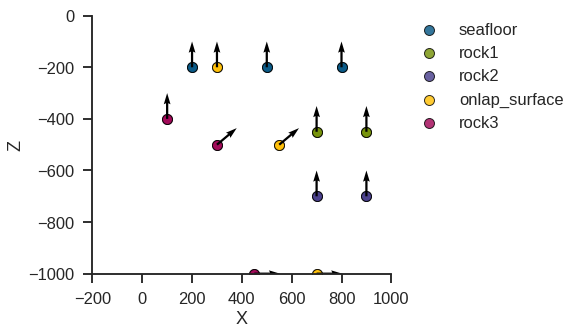

In [4]:
gp.plot.plot_data(geo_model)

In [5]:
gp.set_interpolation_data(geo_model, verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [6]:
geo_model.set_regular_grid([-200,1000,-500,500,-1000,0], [50,50,50])

Grid Object. Values: 
array([[-188., -490., -990.],
       [-188., -490., -970.],
       [-188., -490., -950.],
       ...,
       [ 988.,  490.,  -50.],
       [ 988.,  490.,  -30.],
       [ 988.,  490.,  -10.]])

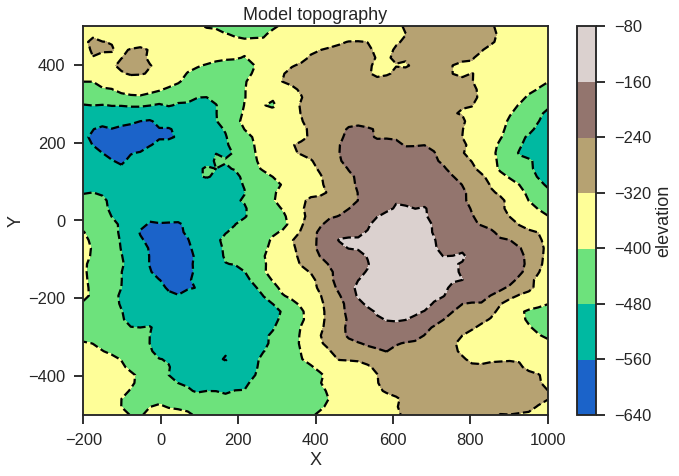

In [7]:
geo_model.set_topography(d_z=np.array([-600,-100]))

Now topography exist but not activated:

In [8]:
geo_model.grid.set_active('topography')

In [9]:
s = gp.compute_model(geo_model, compute_mesh=True, debug=False)

In [10]:
geo_model.solutions.geological_map

array([[5., 5., 5., ..., 2., 2., 2.]])

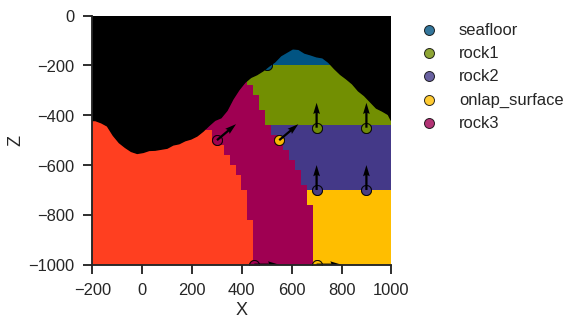

In [11]:
gp.plot.plot_section(geo_model, 25, plot_data=True)

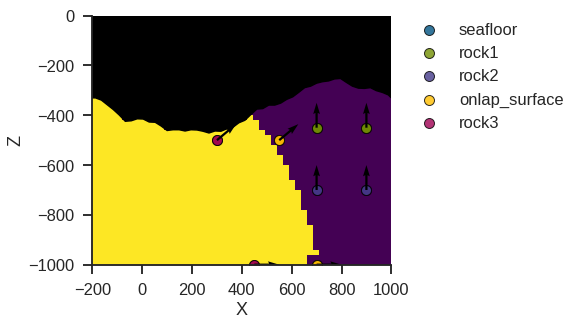

In [12]:
gp.plot.plot_section(geo_model, 2, block=geo_model.solutions.mask_matrix_pad[3].T, plot_data=True,
                    )

In [13]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion
basement,5,Erosion


In [14]:
vtkp = gp.plot.plot_3D(geo_model, render_surfaces=True, render_data=False)

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


holding... Use vtk.resume to go back to the interactive window


In [15]:
vtkp.set_real_time_on()

vtk-gempy real time is:True


/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


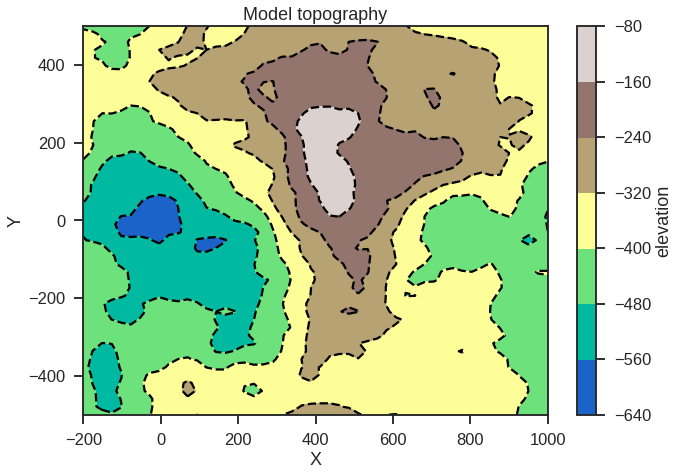

In [18]:
geo_model.set_topography(d_z=np.array([-600,-100]), plot_object=vtkp)

In [19]:
vtkp.resume()

holding... Use vtk.resume to go back to the interactive window


In [20]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,seafloor,seafloor_series,1,False,#015482,1
1,rock1,right_series,1,False,#728f02,2
2,rock2,right_series,2,False,#443988,3
5,onlap_surface,onlap_series,1,False,#ffbe00,4
3,rock3,left_series,1,False,#9f0052,5
4,basement,basement,1,True,#ff3f20,6


In [59]:
import vtk
import matplotlib.colors as mcolors

# colors = vtk.vtkUnsignedCharArray()
# colors.SetNumberOfComponents(3)
# colors.SetName("Colors")
LUT = {}
arr_ = np.empty((0, 3), dtype='int')
for idx, val in geo_model.surfaces.df['color'].iteritems():
    rgb = (256 * np.array(mcolors.hex2color(val)))
    arr_ = np.vstack((arr_, rgb))
sel = np.round(geo_model.solutions.topography_map).astype(int)[0]

rgb = arr_[sel-1]
nv = numpy_to_vtk(arr_[sel-1], array_type=3)
# for i in range(0, sel.shape[0]):
#     colors.InsertNextTuple(rgb[i])


In [63]:
%%timeit
arr_ = np.empty((0, 3), dtype='int')
for idx, val in geo_model.surfaces.df['color'].iteritems():
    rgb = (256 * np.array(mcolors.hex2color(val)))
    arr_ = np.vstack((arr_, rgb))
sel = np.round(geo_model.solutions.topography_map).astype(int)[0]

rgb = arr_[sel-1]
nv = numpy_to_vtk(arr_[sel-1], array_type=3)

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


231 µs ± 32.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
vtkp.close_window()

In [45]:
out_pd = vtkp._topography_delauny.GetOutput()
out_pd.GetPointData().SetScalars(colors)

0

In [49]:
colors.GetDataType()

3

In [53]:
nv.GetDataType()

3

In [60]:
nv = numpy_to_vtk(arr_[sel-1], array_type=3)

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [61]:
from vtk.util.numpy_support import numpy_to_vtk
out_pd = vtkp._topography_delauny.GetOutput()
out_pd.GetPointData().SetScalars(nv)

0

In [62]:
vtkp.interactor.Render()


In [ ]:
vtkp.render_surfaces()
vtkp.interactor.Render()
vtkp.render_topography()



In [132]:
sel = np.round(geo_model.solutions.topography_map).astype(int)[0]
sel

array([5, 5, 5, ..., 2, 2, 2])

In [137]:
arr_[sel-1]

array([[159.62352941,   0.        ,  82.32156863],
       [159.62352941,   0.        ,  82.32156863],
       [159.62352941,   0.        ,  82.32156863],
       ...,
       [114.44705882, 143.56078431,   2.00784314],
       [114.44705882, 143.56078431,   2.00784314],
       [114.44705882, 143.56078431,   2.00784314]])

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


(vtkCommonCorePython.vtkDoubleArray)0x7ffb6c8192e8

In [145]:
colors.Set(numpy_to_vtk(arr_[sel-1]))

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


TypeError: no overloads of SetArray() take 1 argument

In [92]:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,color,vertices,edges,id,r,g,b
0,seafloor,seafloor_series,1.0,False,#015482,"[[-104.0, 20.0, -210.0], [-104.0, 40.0, -210.0...","[[2, 1, 0], [3, 1, 2], [5, 2, 4], [6, 2, 5], [...",1.0,NaN,NaN,NaN
1,rock1,right_series,1.0,False,#728f02,"[[400.0, -440.0, -460.00003814697266], [400.0,...","[[2, 1, 0], [3, 1, 2], [5, 4, 3], [6, 4, 5], [...",2.0,1.003922,84.329412,130.509804
2,rock2,right_series,2.0,False,#443988,"[[544.0, -500.0, -710.0], [544.0, -480.0, -710...","[[2, 1, 0], [3, 1, 2], [3, 4, 1], [5, 4, 3], [...",3.0,114.447059,143.560784,2.007843
5,onlap_surface,onlap_series,1.0,False,#ffbe00,"[[278.42149353027344, -100.0, -220.0], [280.0,...","[[2, 1, 0], [5, 4, 3], [8, 7, 6], [6, 7, 9], [...",4.0,159.623529,0.000000,82.321569
3,rock3,left_series,1.0,False,#9f0052,"[[-200.0, -400.0, -406.2955093383789], [-200.0...","[[2, 1, 0], [3, 1, 2], [3, 4, 1], [5, 4, 3], [...",5.0,68.266667,57.223529,136.533333
4,basement,basement,1.0,True,#ff3f20,NaN,NaN,6.0,256.000000,190.745098,0.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.000000,63.247059,32.125490


In [146]:
# arr = c.map(LUT)
# for i in range(0, np.round(geo_model.solutions.topography_map).astype(int)[0].shape[0]):
#      colors.InsertNextTuple(arr[i])

out_pd = vtkp._topography_delauny.GetOutput()
out_pd.GetPointData().SetScalars(numpy_to_vtk(arr_[sel-1]))
        

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


0

In [58]:
colors.SetTuple

In [31]:
val = np.round(geo_model.solutions.topography_map).astype(int)[0]

In [49]:
 a = geo_model.surfaces.df.set_index('id')['color']
    
a.iteritems

<bound method Series.iteritems of id
1    #015482
2    #728f02
3    #443988
4    #ffbe00
5    #9f0052
6    #ff3f20
Name: color, dtype: object>

In [79]:
mcolors.hex2color??

In [59]:
from vtk.util.numpy_support import numpy_to_vtk

In [65]:
np.flatiter?

In [40]:
c = geo_model.surfaces.df.set_index('id')['color'][val]
c.values

array(['#ff3f20', '#ff3f20', '#ff3f20', ..., '#443988', '#443988',
       '#443988'], dtype=object)

In [37]:
mcolors.hex2color(c.values)

ValueError: Invalid RGBA argument: array(['#ff3f20', '#ff3f20', '#ff3f20', ..., '#443988', '#443988',
       '#443988'], dtype=object)

In [ ]:
255.0 * np.array(mcolors.hex2color(255.0 * np.array(mcolors.hex2color(geo_model.surfaces.df.set_index('id')['color']

In [83]:
arr[0]

array([256.        ,  63.24705882,  32.1254902 ])

In [84]:
%%timeit


1.23 ms ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [168]:
out_pd = vtkp._topography_delauny.GetOutput()
out_pd.GetPointData().SetScalars(colors)

0

In [156]:
out_pd = vtkp._topography_delauny.GetOutput()
out_pd.GetPointData().SetScalars(numpy_to_vtk(arr_[sel-1]))

/home/miguel/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


0

In [33]:
vtkp.render_surfaces()
vtkp.interactor.Render()
vtkp.render_topography()

In [155]:
vtkp.resume()

holding... Use vtk.resume to go back to the interactive window


In [ ]:
break

In [ ]:
vtkp.restart()

In [ ]:
# vtkp.set_topography()

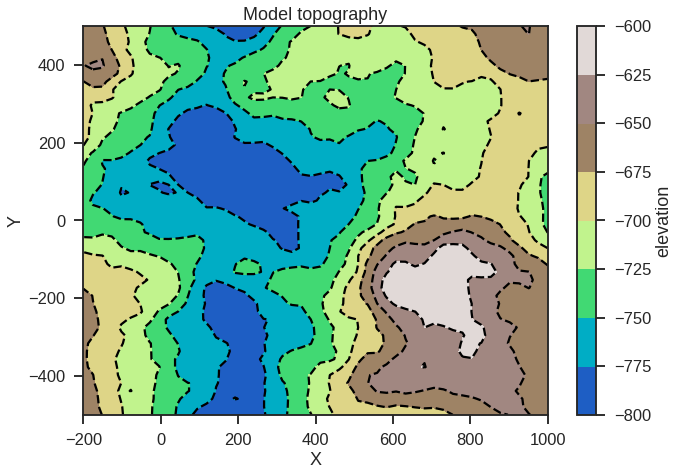

In [62]:
geo_model.set_topography(d_z=np.array([-800,-600]))#, plot_object= vtkp)

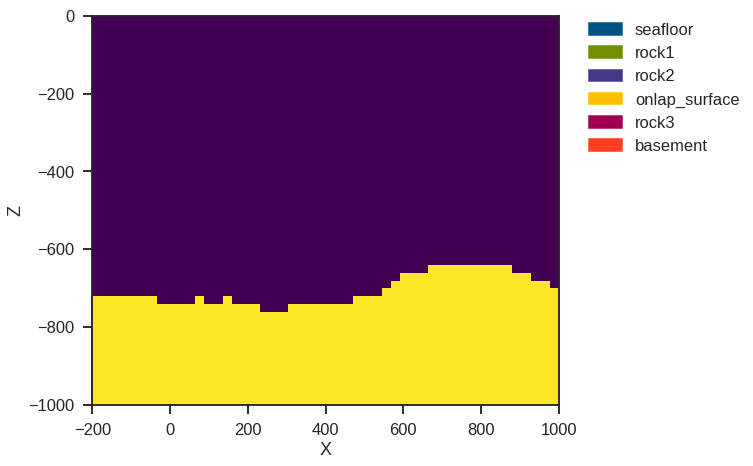

In [63]:
gp.plot.plot_section(geo_model, 25, direction='y',
                     block=~geo_model.solutions.grid.regular_grid.mask_topo,
                show_topo=False)

In [ ]:
gp.plot.plot_section(geo_model, 2, direction='y',
                     block=geo_model.solutions.mask_matrix[1].reshape(50,50,50) * ~geo_model.grid.regular_grid.mask_topo,
                show_topo=False)

In [ ]:
geo_model.solutions.padding_mask_matrix()

In [ ]:
gp.plot.plot_section(geo_model, 2, direction='y', block=geo_model.solutions.mask_matrix[1],
                show_topo=False)

In [ ]:
gp.plot.plot_section(geo_model, 2, direction='y', block=geo_model.solutions.mask_matrix_pad[2].T,
                show_topo=False)

In [ ]:
gp.compute_model(geo_model)

In [ ]:
vtkp = gp.plot.plot_3D(geo_model)

In [ ]:
vtkp.set_real_time_on()

In [ ]:
geo_model.set_topography(d_z=np.array([-600,-100]), plot_object= vtkp)

In [ ]:
vtkp.resume()

Save model if any changes were made:

In [ ]:
# geo_model.save_model('Tutorial_ch1-8_Onlap_relations', path= '../data/gempy_models',)